In [84]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, ElasticNet, ElasticNetCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, r2_score 
from sklearn import metrics
%matplotlib inline

In [49]:
abbrev = pd.read_csv("data/abbrev.csv")

In [50]:
predictors = ['household_size', 'empl_agriculture', 'empl_professional','empl_social', 'empl_services', 'empl_manufacturing', 'empl_retail',
              'prc_fam_poverty', 'avg_income', 'prc_public_transp', 'population', 'pop_65_plus', 'health_ins', 'area', 
              'domestic_passengers', 'intl_passengers', 'ten_plus', 'order', 'density']
outcome = "deaths"

In [53]:
# standard score normalize the predictor data
scaler = StandardScaler().fit(abbrev[predictors])
X = pd.DataFrame(scaler.transform(abbrev[predictors]), columns=predictors)

In [94]:
X.describe()

,household_size,empl_agriculture,empl_professional,empl_social,empl_services,empl_manufacturing,empl_retail,prc_fam_poverty,avg_income,prc_public_transp,population,pop_65_plus,health_ins,area,domestic_passengers,intl_passengers,ten_plus,order,density
count,8.270000e+02,8.270000e+02,8.270000e+02,8.270000e+02,8.270000e+02,8.270000e+02,8.270000e+02,8.270000e+02,8.270000e+02,8.270000e+02,8.270000e+02,8.270000e+02,8.270000e+02,8.270000e+02,8.270000e+02,8.270000e+02,8.270000e+02,8.270000e+02,8.270000e+02
mean,3.385710e-16,-2.651379e-18,-3.683403e-18,1.308070e-17,1.030346e-17,1.379388e-17,2.345128e-17,1.346162e-16,-3.040695e-17,-2.948401e-17,-3.208504e-17,1.733465e-16,-3.029553e-15,-6.578105e-18,6.213960e-17,-7.625232e-17,7.111737e-17,-1.487457e-16,1.612643e-17
std,1.000605e+00,1.000605e+00,1.000605e+00,1.000605e+00,1.000605e+00,1.000605e+00,1.000605e+00,1.000605e+00,1.000605e+00,1.000605e+00,1.000605e+00,1.000605e+00,1.000605e+00,1.000605e+00,1.000605e+00,1.000605e+00,1.000605e+00,1.000605e+00,1.000605e+00
min,-2.759844e+00,-2.874022e+01,-2.874022e+01,-2.874022e+01,-2.874022e+01,-2.874022e+01,-2.874022e+01,-1.820517e+00,-2.214456e+00,-8.612887e+00,-4.640806e-01,-2.110942e+00,-9.951393e+00,-5.794379e-01,-4.539130e-01,-2.566046e-01,-2.678975e+00,-2.767585e+00,-2.498650e-01
25%,-7.213167e-01,3.478485e-02,3.477767e-02,3.477351e-02,3.478261e-02,3.476463e-02,3.478575e-02,-7.373239e-01,-6.593107e-01,1.161051e-01,-4.073826e-01,-6.369323e-01,-3.755312e-02,-3.483116e-01,-4.539130e-01,-2.566046e-01,-5.660038e-01,-5.981132e-01,-2.096455e-01
50%,-1.617211e-01,3.478833e-02,3.479080e-02,3.478951e-02,3.479181e-02,3.478752e-02,3.479366e-02,-1.486322e-01,-1.795283e-01,1.161051e-01,-2.988431e-01,-9.638015e-02,3.285949e-01,-2.412235e-01,-4.217655e-01,-2.566046e-01,5.545816e-02,-1.642188e-01,-1.708331e-01
75%,4.778168e-01,3.479691e-02,3.480696e-02,3.481136e-02,3.480267e-02,3.481709e-02,3.480203e-02,5.577978e-01,4.667065e-01,1.161051e-01,6.448881e-03,4.452745e-01,4.873042e-01,-8.645531e-02,-2.177694e-01,-2.566046e-01,6.769202e-01,8.482015e-01,-8.304943e-02
max,6.073773e+00,3.495869e-02,3.493245e-02,3.494833e-02,3.494842e-02,3.502118e-02,3.486186e-02,4.796378e+00,5.451130e+00,1.161056e-01,1.655084e+01,9.470146e+00,7.802343e-01,1.296791e+01,4.477269e+00,8.051965e+00,3.038476e+00,1.715990e+00,2.082053e+01


In [99]:
y = abbrev[outcome]

### Linear Regression

In [100]:
lrm = LinearRegression().fit(X, y)
lrm.score(X, y)

0.6087254548799846

In [101]:
for a,b in zip(predictors, lrm.coef_):
    print(a, "\t", b)

household_size 	 21.734114214905684
empl_agriculture 	 963296.2041102088
empl_professional 	 -2665063.1204670616
empl_social 	 43881.263100810094
empl_services 	 -155976.0794687722
empl_manufacturing 	 614462.8317713217
empl_retail 	 1199394.6445319208
prc_fam_poverty 	 -5.39347403474086
avg_income 	 65.47599576501896
prc_public_transp 	 -3.7728344272479495
population 	 -8.684279676659914
pop_65_plus 	 25.261426517788415
health_ins 	 -14.86830230244622
area 	 21.069432886443597
domestic_passengers 	 -21.4886414855468
intl_passengers 	 -60.32309844837688
ten_plus 	 66.93796274471961
order 	 -13.474926388027281
density 	 361.58939999379703


### Elastic Net

#### ElasticNetCV

In [102]:
encv = ElasticNetCV(normalize=True, max_iter=60000, random_state=101, cv=5)
encv.fit(X, y)

ElasticNetCV(alphas=None, copy_X=True, cv=5, eps=0.001, fit_intercept=True,
             l1_ratio=0.5, max_iter=60000, n_alphas=100, n_jobs=None,
             normalize=True, positive=False, precompute='auto',
             random_state=101, selection='cyclic', tol=0.0001, verbose=0)

In [105]:
encv.score(X, y)
# yikes, bad

0.0048353064314873295

In [107]:
# try with cv=3
encv = ElasticNetCV(normalize=True, max_iter=60000, random_state=101, cv=3)
encv.fit(X, y)
encv.score(X, y)
# and not better

0.002072530058804034

In [108]:
# try with cv=7
encv = ElasticNetCV(normalize=True, max_iter=60000, random_state=101, cv=7)
encv.fit(X, y)
encv.score(X, y)
# and not better

0.00046658602501392643

#### ElasticNet with GridSearchCV

In [89]:
param_grid = [{'l1_ratio':[0.1, 0.3, 0.5, 0.7, 0.9]}]
enm = ElasticNet(normalize=True, max_iter=60000, random_state=101)
scorer = make_scorer(r2_score)
search = GridSearchCV(enm, param_grid, cv=5, scoring=scorer).fit(abbrev[predictors], abbrev[outcome])

/home/anna/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [90]:
search

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True,
                                  l1_ratio=0.5, max_iter=60000, normalize=True,
                                  positive=False, precompute=False,
                                  random_state=101, selection='cyclic',
                                  tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid=[{'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=make_scorer(r2_score), verbose=0)

In [91]:
search.best_params_

{'l1_ratio': 0.9}

In [92]:
search.best_estimator_

ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.9,
           max_iter=60000, normalize=True, positive=False, precompute=False,
           random_state=101, selection='cyclic', tol=0.0001, warm_start=False)

In [93]:
search.best_score_
# yikes, not good, and pretty much the same as ElasticNetCV

0.005779057005508495

#from sklearn.pipeline import make_pipeline
##>>> clf = make_pipeline(preprocessing.StandardScaler(), svm.SVC(C=1))
#>>> cross_val_score(clf, X, y, cv=cv)

In [66]:
enm = ElasticNet(random_state=101, max_iter=60000)
enm.fit(abbrev[predictors], abbrev[outcome])
enm.score(abbrev[predictors], abbrev[outcome])

/home/anna/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 27973608.83779774, tolerance: 13709.033854171703
  positive)


0.5890843765741265

In [12]:
for x, y in zip(predictors, enm.coef_):
    print(x, "\t", y)

household_size 	 3.7585762302816623
empl_agriculture 	 6.14421129980911e-05
empl_professional 	 -0.0004349503668353485
empl_social 	 0.00022210895632088
empl_services 	 -3.052808401154947e-05
empl_manufacturing 	 0.000510130403544231
empl_retail 	 -0.00034501222495761776
prc_fam_poverty 	 -4.097372071085263
avg_income 	 0.00011059140879492039
prc_public_transp 	 -6.211411401818491e-08
population 	 -2.800782950876621e-05
pop_65_plus 	 4.797355626434458
health_ins 	 -3.050440573128758
area 	 0.012544283143949654
domestic_passengers 	 -3.5613886847970177e-06
intl_passengers 	 -1.6971353575944596e-05
ten_plus 	 6.772142986099332
order 	 -0.14473535022741355
density 	 0.10389248280522088


### Random Forest

In [45]:
rfm = RandomForestRegressor(max_depth=10, random_state=101)
rfm.fit(X, y)
rfm.score(X, y)

/home/anna/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


TypeError: Singleton array array(361.58939999) cannot be considered a valid collection.

In [18]:
rfm

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=101, verbose=0,
                      warm_start=False)

In [20]:
for x, y in zip(predictors, rfm.feature_importances_):
    print(x, "\t", y)

household_size 	 0.0007878166151606204
empl_agriculture 	 0.006112634530368612
empl_professional 	 0.002500946802420563
empl_social 	 0.004227000351078705
empl_services 	 0.014860093548997037
empl_manufacturing 	 0.012918852832411301
empl_retail 	 0.001001416245173311
prc_fam_poverty 	 0.004133959550093132
avg_income 	 0.38604183128331515
prc_public_transp 	 0.19045096361289598
population 	 0.010337990546694025
pop_65_plus 	 0.008731779156967188
health_ins 	 0.0002586249183814921
area 	 0.006467183155095245
domestic_passengers 	 0.0006877320175733158
intl_passengers 	 0.03262527650961451
ten_plus 	 0.11232300268800592
order 	 0.001112047875149453
density 	 0.2044208477606045


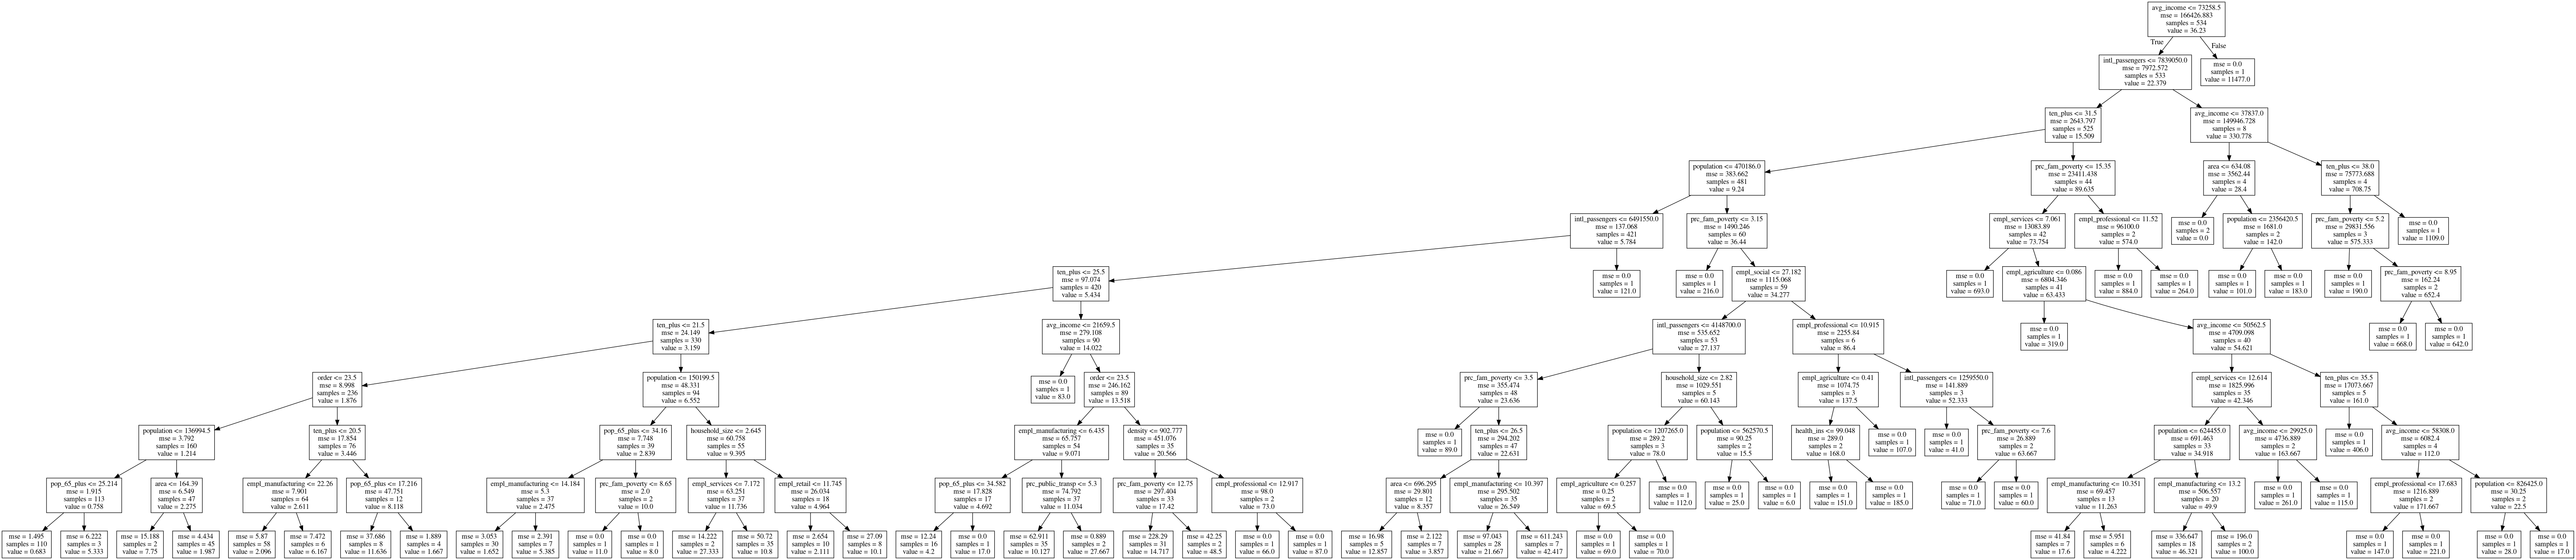

In [26]:
estimator = rfm.estimators_[5]
# https://medium.com/@anthonycarlleston/visualizing-the-decisiontrees-in-randomforestregressor-in-a-pipeline-with-python-f5519f80e3f8
# https://scikit-learn.org/stable/modules/tree.html

from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
import os

os.environ['PATH'] = os.environ['PATH']+';'+os.environ['CONDA_PREFIX']+r"\Library\bin\graphviz"
dot_data = StringIO()
export_graphviz(estimator, feature_names=predictors, out_file=dot_data)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 
Image(graph.create_png())